Importing Libraries

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

Data Loading

In [ ]:
df=pd.read_csv("df.csv")

Analyzing Data

In [43]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Embarked,Pclass,Survived
0,22.0,7.2500,Female,1,0,2.0,3,Died
1,38.0,71.2833,Male,1,0,0.0,1,Survived
2,26.0,7.9250,Male,0,0,2.0,3,Survived
3,35.0,53.1000,Male,1,0,2.0,1,Survived
4,35.0,8.0500,Female,0,0,2.0,3,Died


In [44]:
df.dtypes

Age         float64
Fare        float64
Sex          object
sibsp         int64
Parch         int64
Embarked    float64
Pclass        int64
Survived     object
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   object 
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Embarked  1307 non-null   float64
 6   Pclass    1309 non-null   int64  
 7   Survived  1309 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 81.9+ KB


In [46]:
df.shape

(1309, 8)

In [47]:
df.describe()

,Age,Fare,sibsp,Parch,Embarked,Pclass
count,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,29.503186,33.281086,0.498854,0.385027,1.492731,2.294882
std,12.905241,51.741500,1.041658,0.865560,0.814626,0.837836
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,7.895800,0.000000,0.000000,1.000000,2.000000
50%,28.000000,14.454200,0.000000,0.000000,2.000000,3.000000
75%,35.000000,31.275000,1.000000,0.000000,2.000000,3.000000
max,80.000000,512.329200,8.000000,9.000000,2.000000,3.000000


Finding Outliers

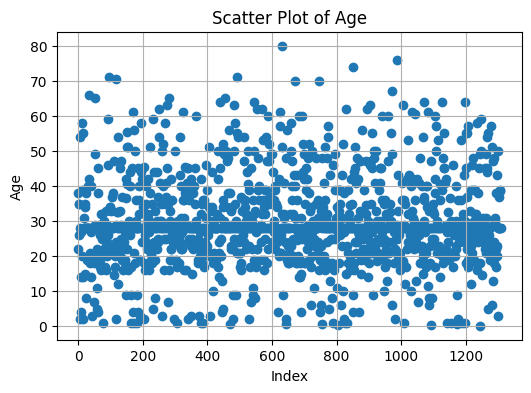

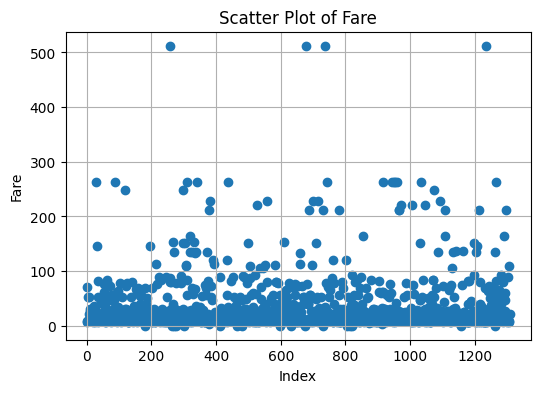

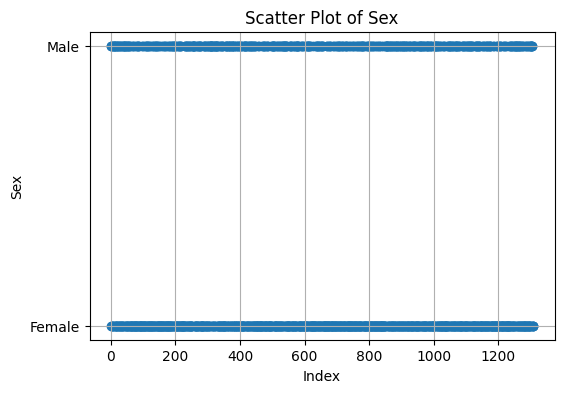

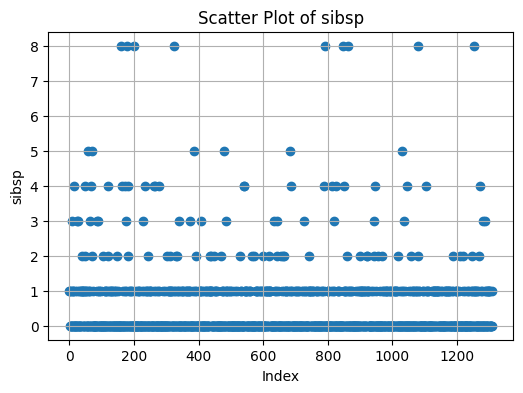

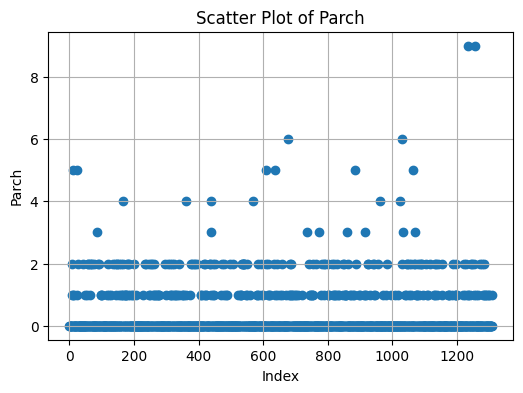

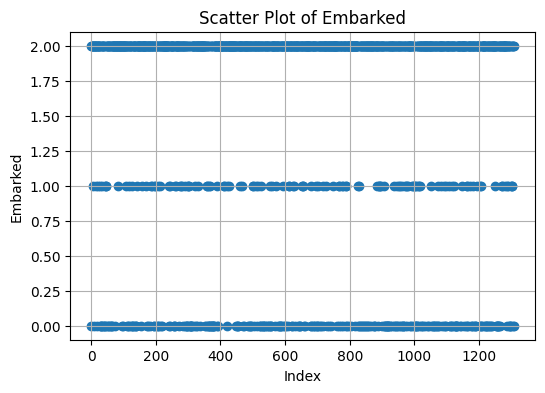

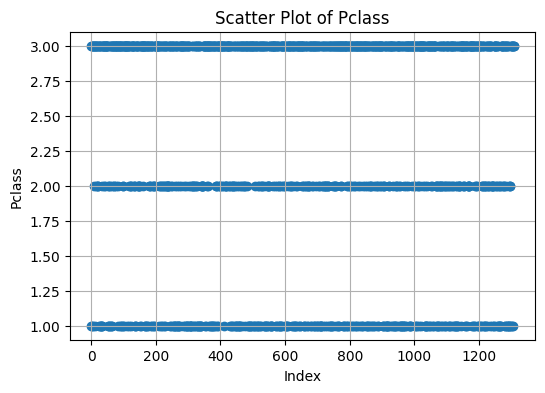

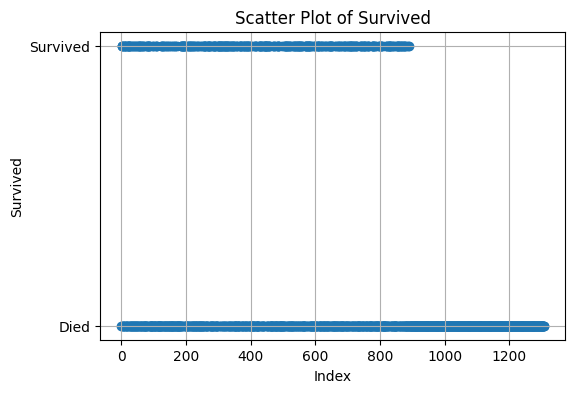

In [48]:


for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df.index, df[col])
    plt.title("Scatter Plot of "+col)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


THESE SCATTTER PLOTS ARE USED TO VISUALIZE THE OUTLIERS

FINDING INDEXES OF OUTLIERS

In [49]:
fareoutliersrows=df.query("Fare>300").index

In [50]:
sibspoutlierrows =df.query("sibsp>5").index

In [51]:
parchoutlierrows =df.query("Parch>5").index

Normalizing outlier

In [ ]:
def outlierfiller(outlierrows,column):
    mean_value = df[column].mean()
    for idx in outlierrows:
        if idx in df.index:
            df.at[idx, column] = mean_value

In [53]:
outlierfiller(fareoutliersrows,"Fare")
df.query("Fare>300")


,Age,Fare,Sex,sibsp,Parch,Embarked,Pclass,Survived


In [54]:
outlierfiller(sibspoutlierrows,"sibsp")
df.query("sibsp>6")

C:\Users\T L S\AppData\Local\Temp\ipykernel_3472\3003349551.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4988540870893812' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, column] = mean_value


,Age,Fare,Sex,sibsp,Parch,Embarked,Pclass,Survived


In [55]:
outlierfiller(parchoutlierrows,"Parch")
df.query("Parch>5")


C:\Users\T L S\AppData\Local\Temp\ipykernel_3472\3003349551.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3850267379679144' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, column] = mean_value


,Age,Fare,Sex,sibsp,Parch,Embarked,Pclass,Survived


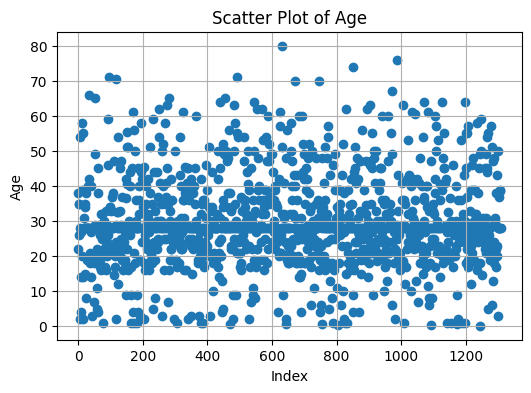

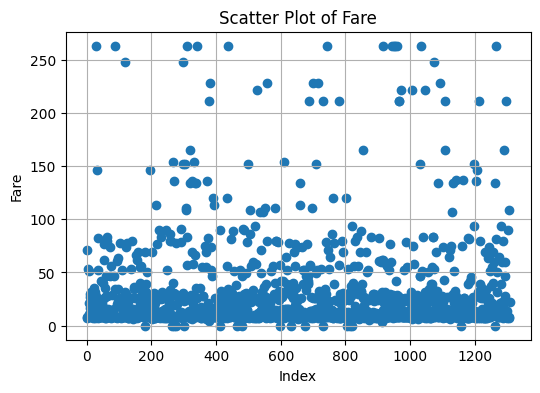

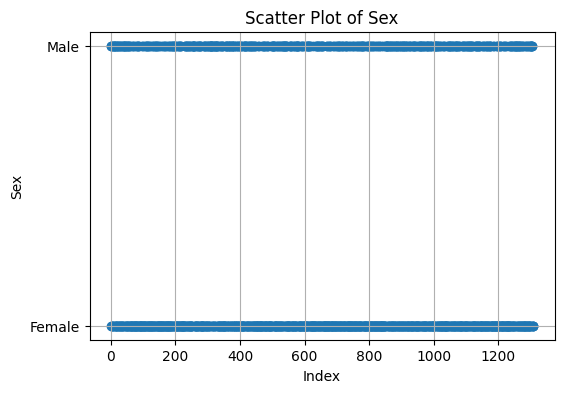

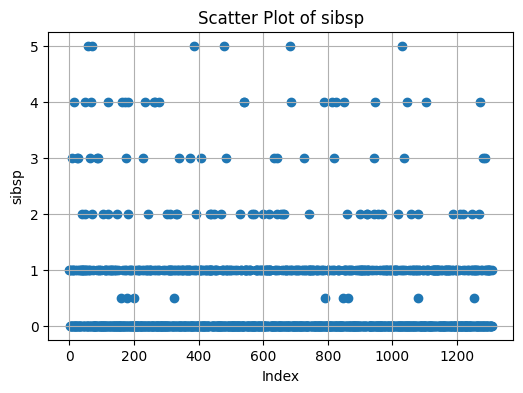

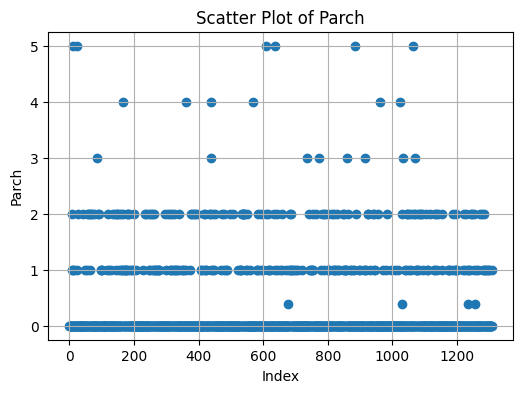

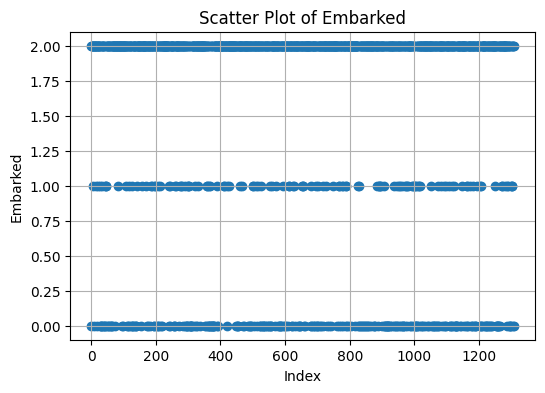

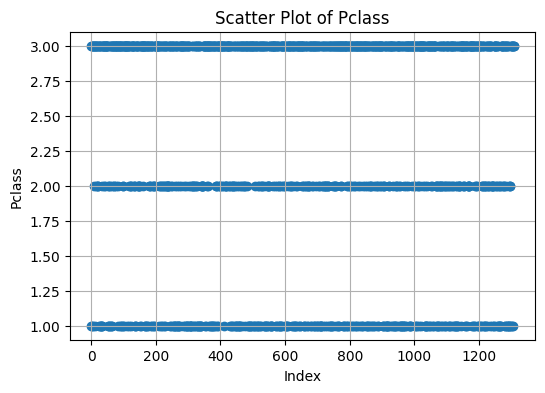

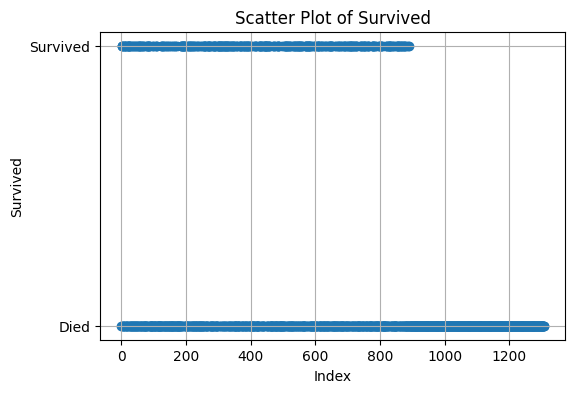

In [56]:

for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df.index, df[col])
    plt.title("Scatter Plot of "+col)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


Finding Null Values 

In [57]:
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Embarked    2
Pclass      0
Survived    0
dtype: int64

In [58]:
embarkednullindexes=df["Embarked"].isnull().index

FILLING NULL VALUES

In [59]:
def Nullvaluefiller(nullrows,column):
    mean_value = df[column].mean()
    for idx in nullrows:
        if idx in df.index:
            df.at[idx, column] = mean_value

In [60]:
Nullvaluefiller(embarkednullindexes,"Embarked")
df.isnull().sum()

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Embarked    0
Pclass      0
Survived    0
dtype: int64

<Axes: xlabel='Survived', ylabel='Age'>

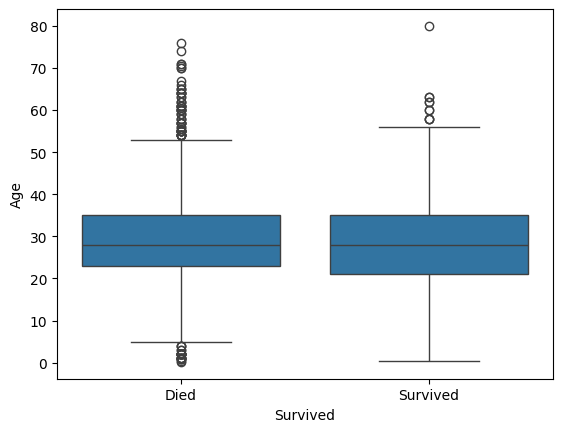

In [70]:
sns.boxplot(x='Survived', y='Age', data=df)


<Axes: xlabel='Sex', ylabel='count'>

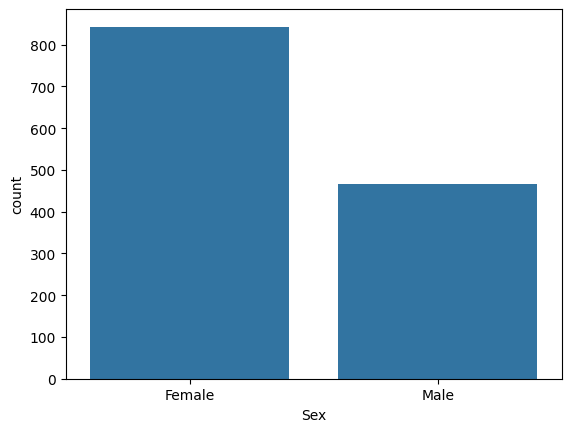

In [73]:
sns.countplot(x='Sex', data=df)



<Axes: xlabel='Pclass', ylabel='count'>

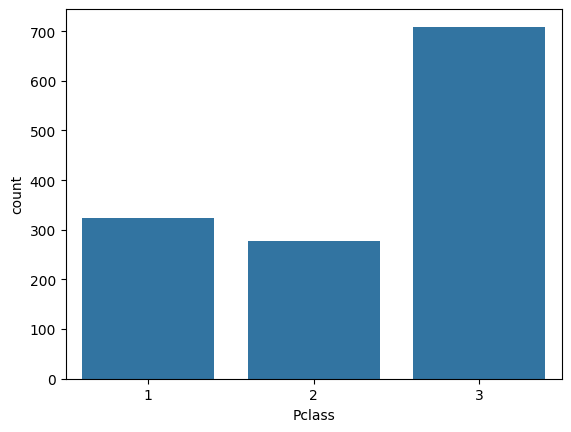

In [74]:
sns.countplot(x='Pclass', data=df)



<Axes: xlabel='Sex', ylabel='count'>

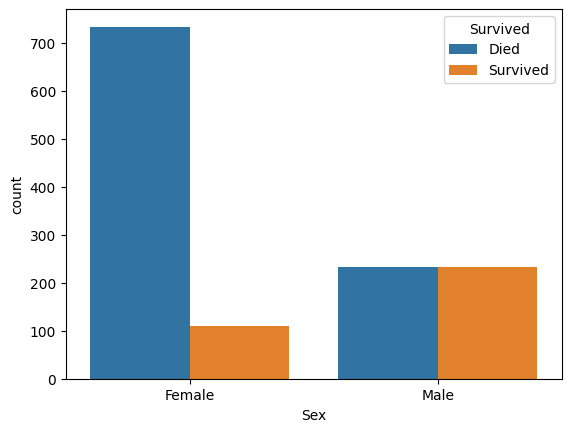

In [76]:
sns.countplot(x='Sex', hue='Survived', data=df)




<Axes: xlabel='Pclass', ylabel='count'>

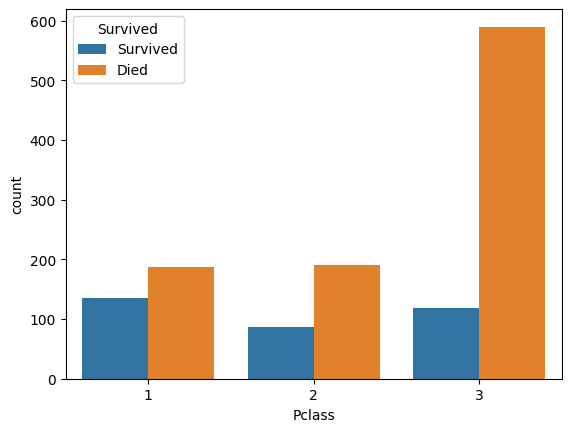

In [84]:
sns.countplot(x='Pclass', hue='Survived', data=df)


<Axes: xlabel='Embarked', ylabel='count'>

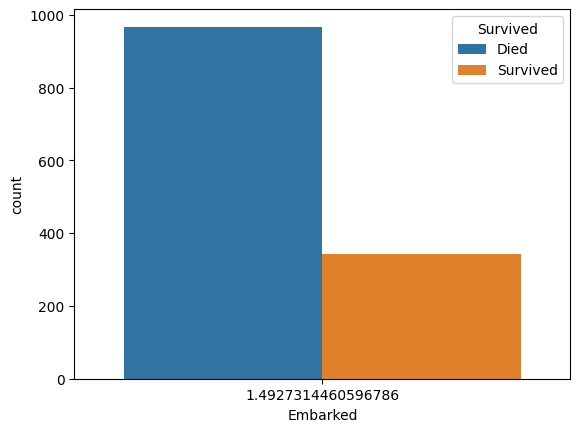

In [85]:
sns.countplot(x='Embarked', hue='Survived', data=df)

<Axes: xlabel='Age'>

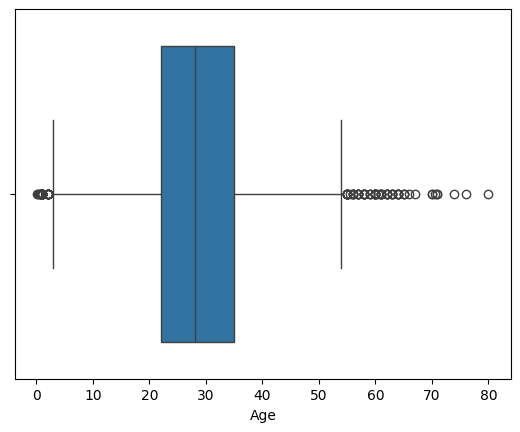

In [69]:
sns.boxplot(x=df['Age'])


Text(0.5, 1.0, 'Age Distribution by Survival')

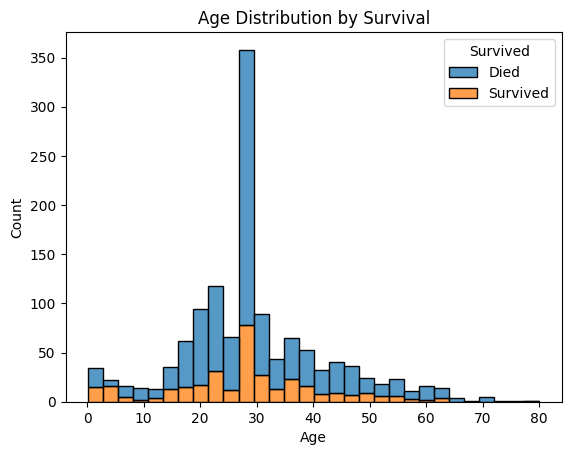

In [101]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')


Text(0.5, 1.0, 'Fare Distribution by Survival')

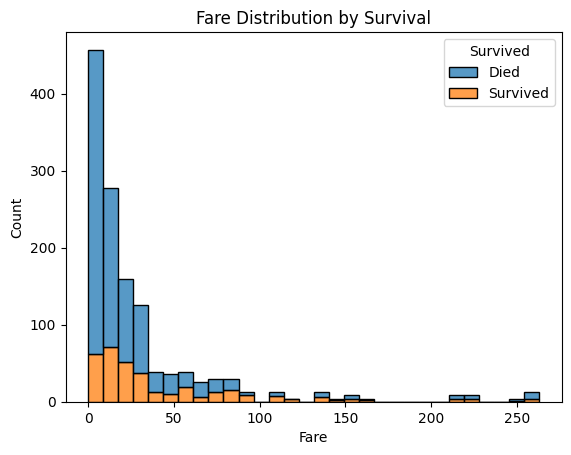

In [102]:
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Fare Distribution by Survival')


Text(0.5, 1.0, 'Siblings Distribution by Survival')

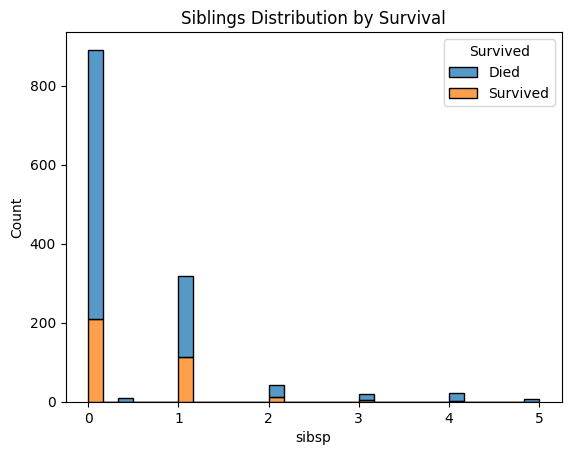

In [105]:
sns.histplot(data=df, x='sibsp', hue='Survived', multiple='stack', bins=30)
plt.title('Siblings Distribution by Survival')


Text(0.5, 1.0, 'parents/Children Abroad Distribution by Survival')

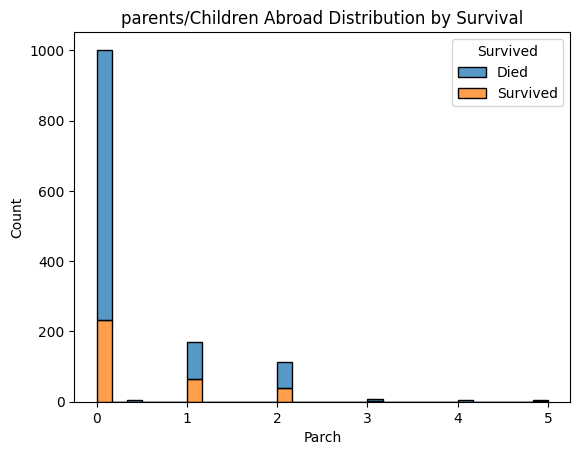

In [106]:
sns.histplot(data=df, x='Parch', hue='Survived', multiple='stack', bins=30)
plt.title('parents/Children Abroad Distribution by Survival')


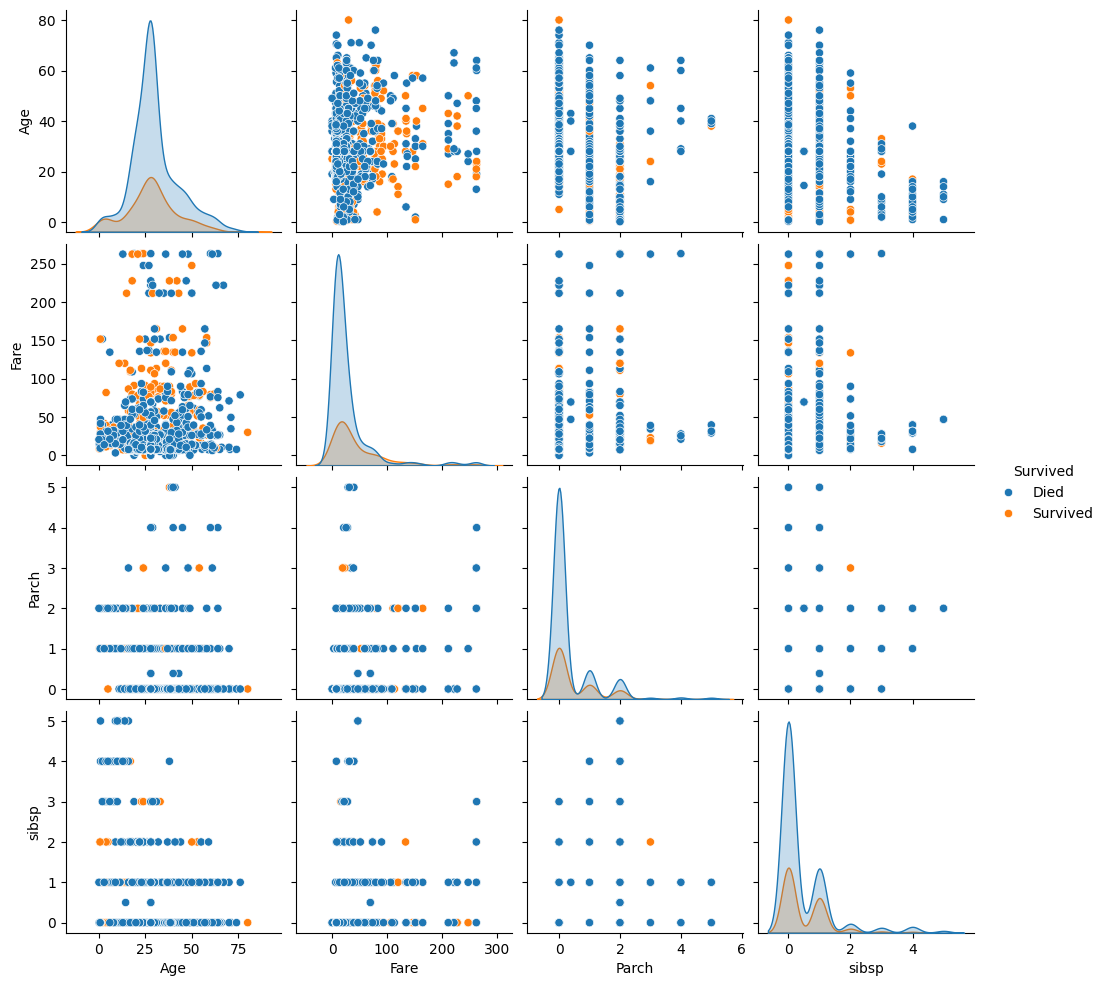

In [87]:
sns.pairplot(df, vars=['Age', 'Fare', 'Parch', 'sibsp'], hue='Survived')


<Axes: >

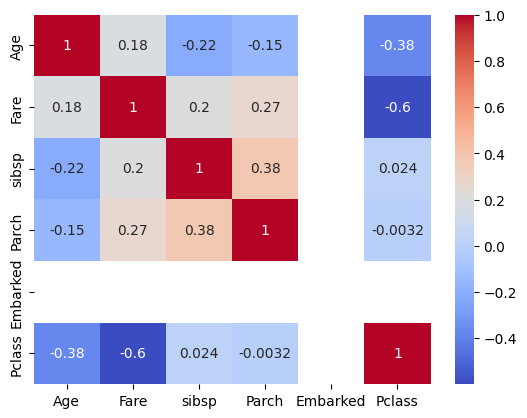

In [88]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


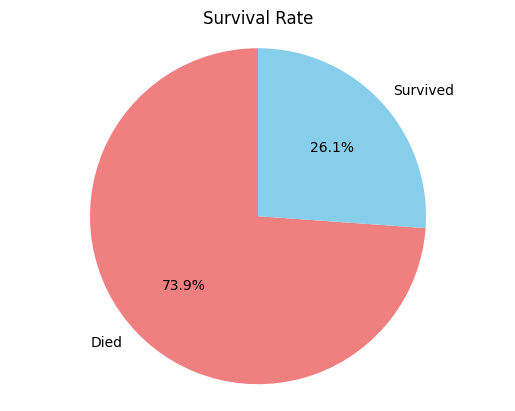

In [91]:
import matplotlib.pyplot as plt

labels = ['Died', 'Survived']
sizes = df['Survived'].value_counts().sort_index()
colors = ['lightcoral', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate')
plt.axis('equal')  
plt.show()


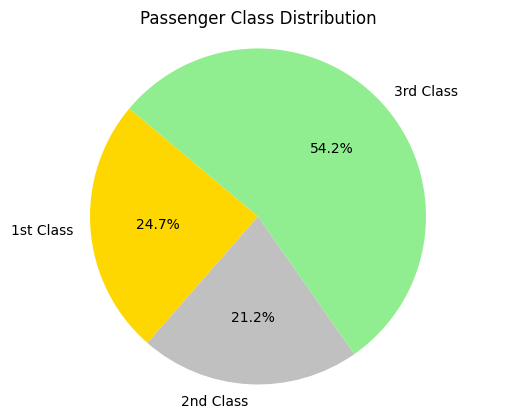

In [92]:
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = df['Pclass'].value_counts().sort_index()
colors = ['gold', 'silver', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Passenger Class Distribution')
plt.axis('equal')
plt.show()


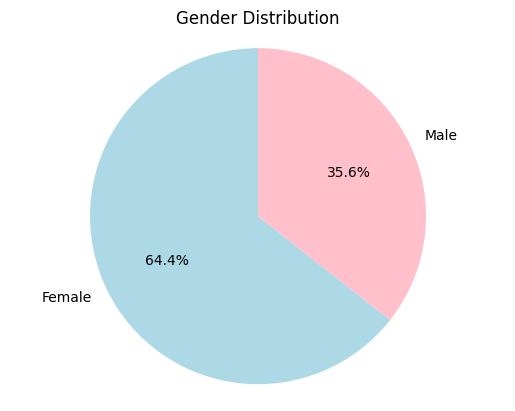

In [93]:
labels = df['Sex'].value_counts().index
sizes = df['Sex'].value_counts()
colors = ['lightblue', 'pink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()
